# Lecture: Edge Detector

## Section 1: Preparation

### Install the libraries

In [171]:
# Import the libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import pyrealsense2 as rs2
import cv2


### Capture an image using realsense camera

In [34]:
pipeline = rs2.pipeline()
config = rs2.config()

config.enable_stream(rs2.stream.color, 640, 480, rs2.format.bgr8, 30)
config.enable_stream(rs2.stream.depth, 640, 480, rs2.format.z16, 30)

pipeline.start(config)

# Display the livestream
while True:
    frame = pipeline.wait_for_frames()
    color_frame = frame.get_color_frame()

    color_image = np.asanyarray(color_frame.get_data())

    cv2.imshow("Captured Image", color_image)

    if cv2.waitKey(1) == ord('q'):
        break

cv2.imwrite('photo.jpg', color_image)

cv2.destroyAllWindows()

pipeline.stop()


## Section 2: Review: Sober Filter & Image gradient

### Display the captured image

The captured image


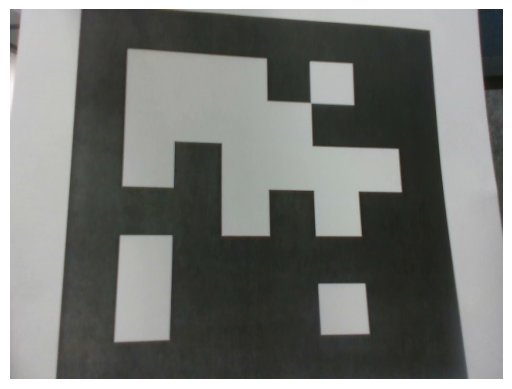

In [172]:
# Load the image
try:
    img = Image.open('photo.jpg')
    img_array = np.array(img)
    # Split the image into RGB channels
    if img_array.shape[-1] != 3: # Check if the image has 3 channels (RGB)
      print("Error: The image does not appear to be an RGB image.")

    print("The captured image")
    plt.axis("off")
    plt.imshow(img_array)


except FileNotFoundError:
    print("Error: The file photo.jpg was not found. Please make sure to capture an image first.")
except Exception as e:
    print(f"An error occurred: {e}")

### Convert the image into grayscale

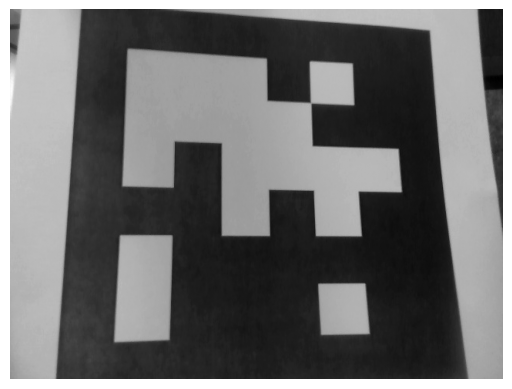

In [211]:
# Convert the image into gray-scale format
img = Image.open('photo.jpg')
# Convert the image to grayscale
img_gray = img.convert('L')

# Convert the grayscale image back to a NumPy array for display
img_gray_array = np.array(img_gray)


plt.axis("off")
plt.imshow(img_gray_array, cmap="gray")
plt.show()

### Define the image convolution

In [212]:
# Image convolution
def image_correlation(image_array, kernel):
    # Assume a gray-scale image
    assert len(image_array.shape) == 2, "Assume a grayscale image so far"
    H, W = image_array.shape
    kh, kw = kernel.shape
    
    # Correlation
    image_array_processed= np.zeros((H - kh + 1, W - kw + 1))
    for i in range(H - kh + 1):
        for j in range(W - kw + 1):
            image_array_processed[i, j] = np.sum(image_array[i:i+kh, j:j+kw] * kernel)
    return image_array_processed
def image_convolution(image_array, kernel):
    kernel_flipped = np.flip(kernel)
    return image_correlation(image_array, kernel_flipped)
def image_convolution_ben(image_array, kernel):
    kernel_flipped = np.flipud(np.fliplr(kernel))
    return image_correlation(image_array, kernel_flipped)
def filter_image(im, filter):
    ##### TODO: Add you code in between #####
    # # In replace of the cv2 function,
    # im_filtered = cv2.filter2D(im, -1, filter)

    # Pad the image to apply the filter.
    ky, kx = filter.shape
    pad_size = ky // 2
    im_padded = np.pad(im, ((pad_size, pad_size), (pad_size, pad_size)), 'constant')
    im_filtered = np.zeros(im.shape)
    for y in range(im.shape[0]):
        for x in range(im.shape[1]):
            im_filtered[y, x] = np.sum(im_padded[y:y + ky, x:x + kx] * filter)
    ##### TODO: Add you code in between #####
    return im_filtered 

### Apply Gaussian blurring

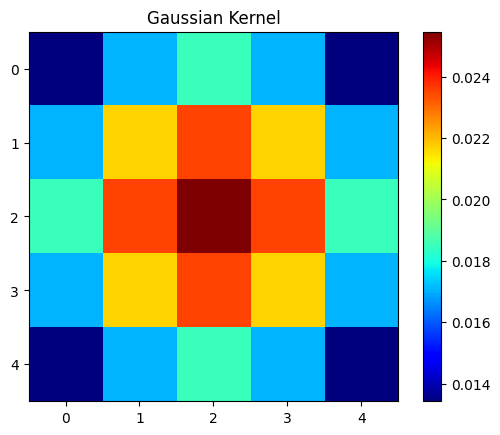

Gaussian blurring: 


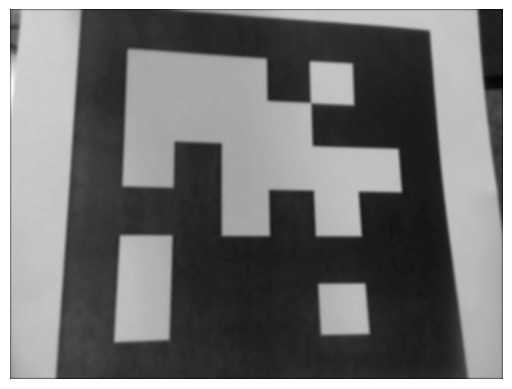

In [213]:
# Define the gaussian kernel
def create_gaussian_kernel(size, sigma=1):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / (2 * np.pi * sigma**2)

kernel_size = 5
sigma = 2.5
gaussian_kernel = create_gaussian_kernel(kernel_size, sigma)
def visualize_gaussian_kernel(kernel):
    plt.close()
    plt.imshow(kernel, cmap='jet', interpolation='nearest')
    plt.colorbar()
    plt.title('Gaussian Kernel')
    plt.show()
visualize_gaussian_kernel(gaussian_kernel)

# Padding the image to ensure a constant size
img_gray_array = np.pad(img_gray_array, pad_width=(int)((kernel_size - 1)/2), mode='constant', constant_values=0)

img_gray_array = image_convolution(img_gray_array, gaussian_kernel)
img_gray_array_display = img_gray_array.astype(np.uint8)
print("Gaussian blurring: ")
plt.axis("off")
plt.imshow(img_gray_array_display, cmap="gray")
plt.show()

In [ ]:
### Gradient detection using Sober filter

Convolution on Sobel filters


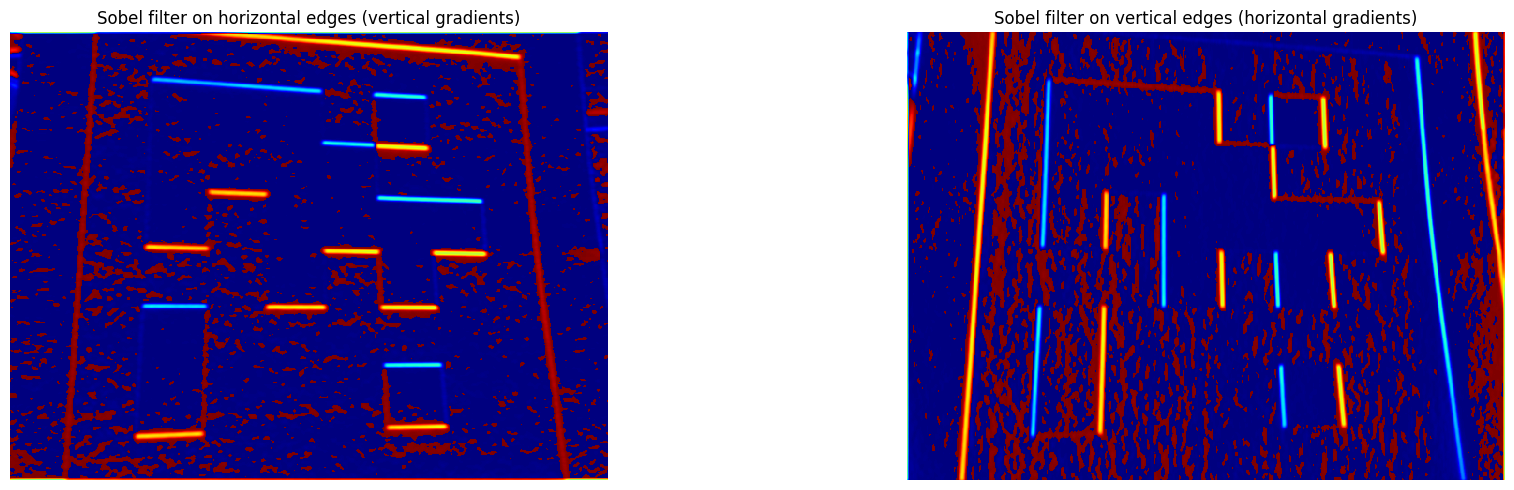

In [247]:
sobel_filter_vertical = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])
sobel_filter_horizontal = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

img_grad_h = image_convolution(img_gray_array, sobel_filter_vertical)
img_grad_h_display = img_grad_h.astype(np.uint8)


img_grad_v = image_convolution(img_gray_array, sobel_filter_horizontal)
img_grad_v_display = img_grad_v.astype(np.uint8)
# Create a figure and axes for displaying the images
print("Convolution on Sobel filters")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Display the vertical edge detection
axes[0].imshow(img_grad_v_display, cmap='jet', interpolation='nearest')
axes[0].set_title('Sobel filter on horizontal edges (vertical gradients)')
axes[0].axis('off')

# Display the horizontal edge detection
axes[1].imshow(img_grad_h_display, cmap='jet', interpolation='nearest')
axes[1].set_title('Sobel filter on vertical edges (horizontal gradients)')
axes[1].axis('off')


plt.tight_layout()
plt.show()

Convolution on Sobel filters


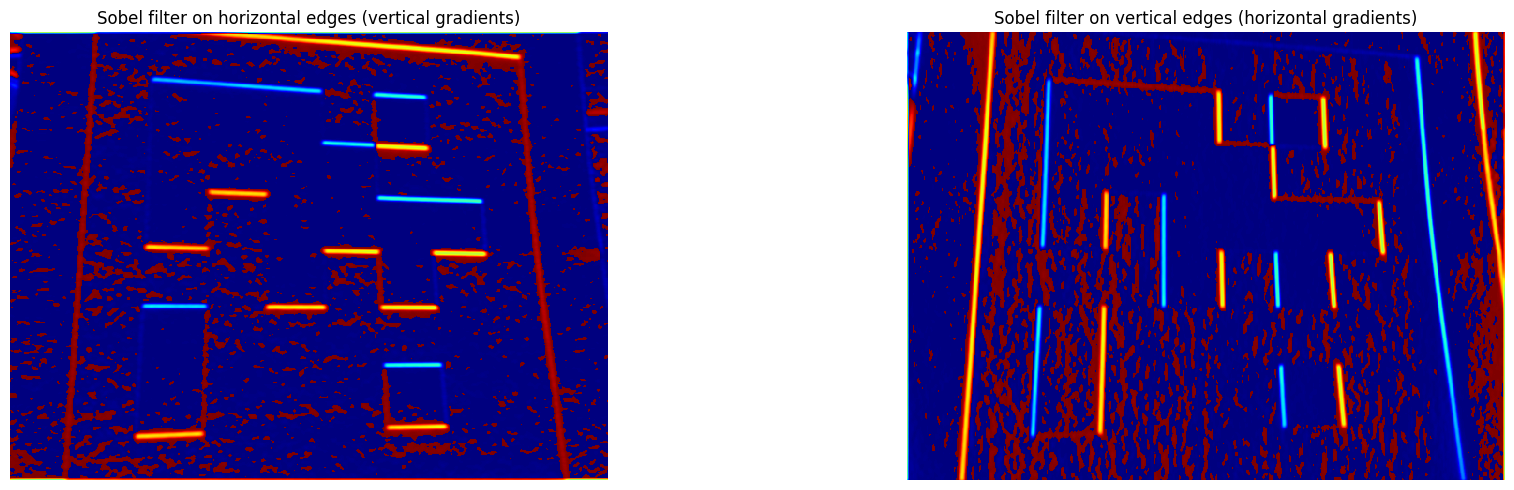

In [248]:
# OpenCV test
sfv = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
sfh = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])
    
img_grad_h_cv = cv2.filter2D(img_gray_array, -1, sfv)  
img_grad_h_display = img_grad_h.astype(np.uint8)


img_grad_v_cv = cv2.filter2D(img_gray_array, -1, sfh)
img_grad_v_display = img_grad_v.astype(np.uint8)
# Create a figure and axes for displaying the images
print("Convolution on Sobel filters")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Display the vertical edge detection
axes[0].imshow(img_grad_v_display, cmap='jet', interpolation='nearest')
axes[0].set_title('Sobel filter on horizontal edges (vertical gradients)')
axes[0].axis('off')

# Display the horizontal edge detection
axes[1].imshow(img_grad_h_display, cmap='jet', interpolation='nearest')
axes[1].set_title('Sobel filter on vertical edges (horizontal gradients)')
axes[1].axis('off')


plt.tight_layout()
plt.show()

In [ ]:
### Gradient magnitude & Angle

Image gradients


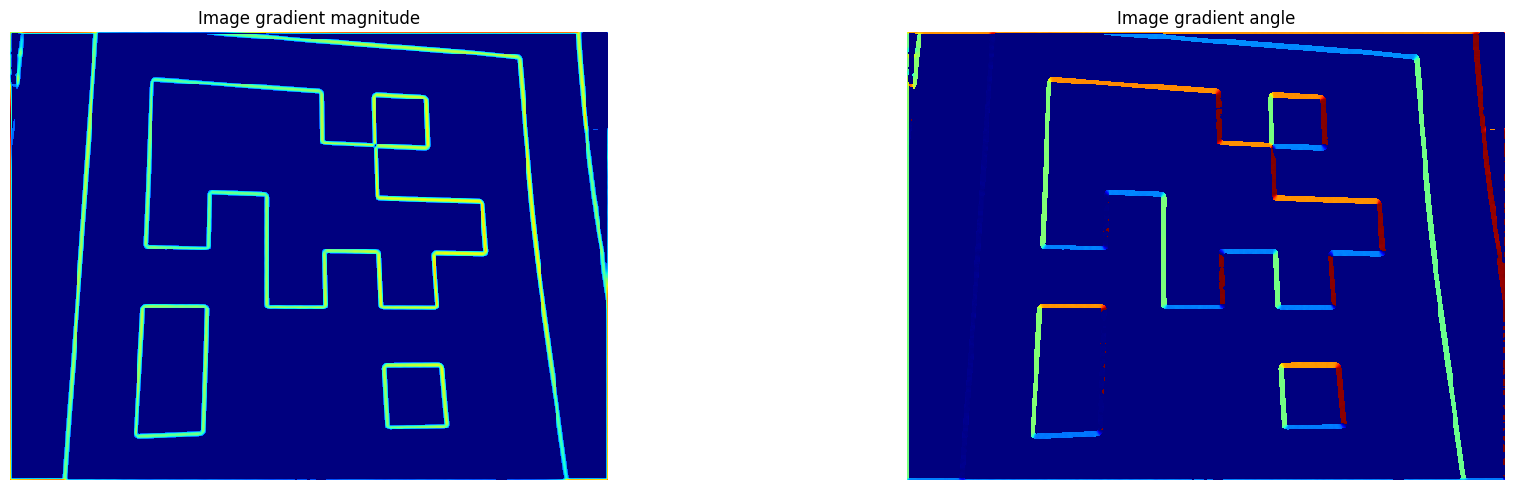

In [252]:
img_grad_mag = np.sqrt(img_grad_v**2 + img_grad_h**2)
img_angle = np.arctan2(img_grad_v, img_grad_h)
img_angle_display = img_angle + np.pi
th = 0.2 * np.max(img_grad_mag)
img_angle[img_grad_mag < th] = 0
img_angle_display[img_grad_mag < th] = 0
img_grad_mag[img_grad_mag < th] = 0
# Create a figure and axes for displaying the images
print("Image gradients")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Display the vertical edge detection
axes[0].imshow(img_grad_mag, cmap='jet', interpolation='nearest')
axes[0].set_title('Image gradient magnitude')
axes[0].axis('off')

# Display the horizontal edge detection
axes[1].imshow(img_angle_display, cmap='jet', interpolation='nearest')
axes[1].set_title('Image gradient angle')
axes[1].axis('off')


plt.tight_layout()
plt.show()

Image gradients


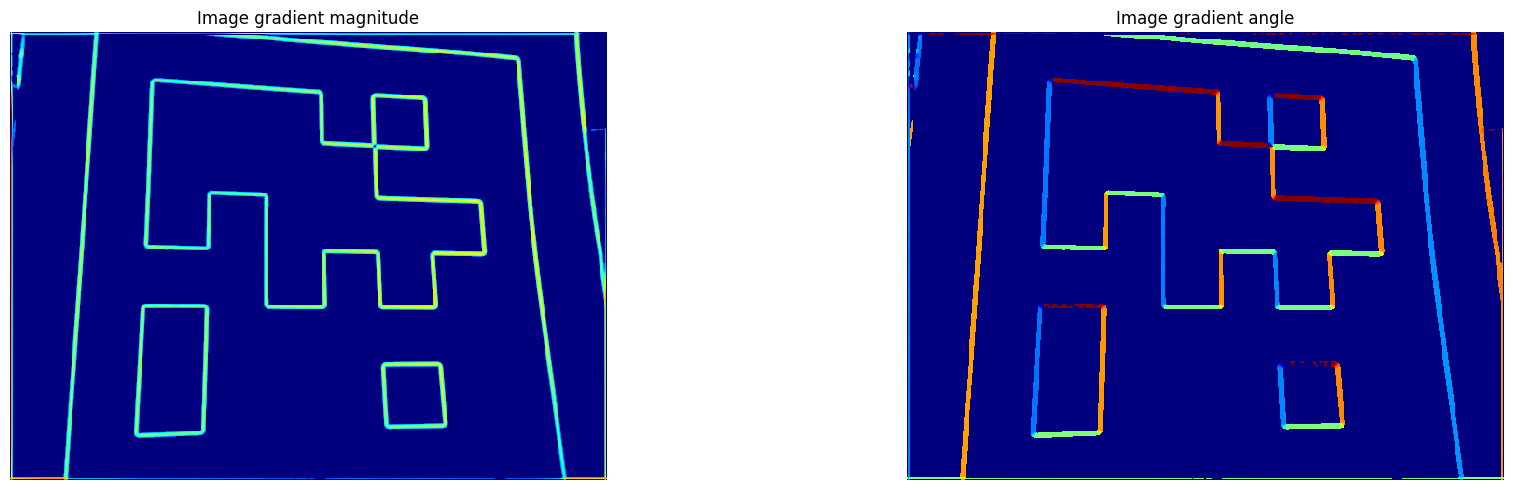

In [250]:
# OpenCV test
img_grad_mag_cv = cv2.magnitude(img_grad_v_cv, img_grad_h_cv)
img_angle_cv = cv2.phase(img_grad_v_cv, img_grad_h_cv)
img_angle_display = img_angle_cv
th = 0.2 * np.max(img_grad_mag)
img_angle_cv[img_grad_mag_cv < th] = 0
img_angle_display[img_grad_mag_cv < th] = 0
img_grad_mag_cv[img_grad_mag_cv < th] = 0
# Create a figure and axes for displaying the images
print("Image gradients")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Display the vertical edge detection
axes[0].imshow(img_grad_mag_cv, cmap='jet', interpolation='nearest')
axes[0].set_title('Image gradient magnitude')
axes[0].axis('off')

# Display the horizontal edge detection
axes[1].imshow(img_angle_display, cmap='jet', interpolation='nearest')
axes[1].set_title('Image gradient angle')
axes[1].axis('off')


plt.tight_layout()
plt.show()

## Section 2: Canny detector 
Reference: https://medium.com/@pasanSK/understanding-and-implementing-canny-edge-detection-in-native-python-52c296255601

In [ ]:
### Non-maximum Suppression

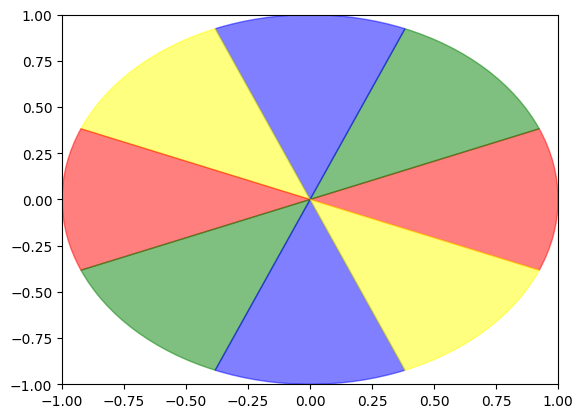

In [253]:
# Illustration of the segments
import matplotlib
from matplotlib.patches import Wedge
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111) 

    
fov1 = Wedge((.0, 0), 1.0, -22.5, 22.5, color="r", alpha=0.5)
fov2 = Wedge((.0, 0), 1.0, 22.5, 67.5, color="g", alpha=0.5)
fov3 = Wedge((.0, 0), 1.0, 67.5, 112.5, color="b", alpha=0.5)
fov4 = Wedge((.0, 0), 1.0, 112.5, 157.5, color="yellow", alpha=0.5)
fov5 = Wedge((.0, 0), 1.0, 157.5, 202.5, color="r", alpha=0.5)
fov6 = Wedge((.0, 0), 1.0, 202.5, 247.5, color="g", alpha=0.5)
fov7 = Wedge((.0, 0), 1.0, 247.5, 292.5, color="b", alpha=0.5)
fov8 = Wedge((.0, 0), 1.0, 292.5, 337.5, color="yellow", alpha=0.5)

ax.add_artist(fov1)
ax.add_artist(fov2)
ax.add_artist(fov3)
ax.add_artist(fov4)
ax.add_artist(fov5)
ax.add_artist(fov6)
ax.add_artist(fov7)
ax.add_artist(fov8)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
plt.show()

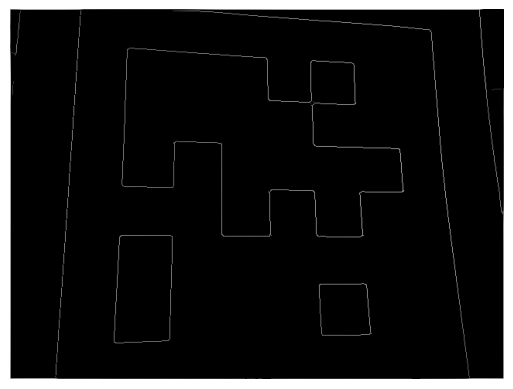

In [263]:
def apply_non_max_suppression(magnitude, orientation):
    # Apply non-maximum suppression to the gradient magnitude
    # This will thin the edges by keeping only the local maxima
    suppressed_magnitude = np.copy(magnitude)
    rows, cols = magnitude.shape
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = orientation[i][j]
            q = [0, 0]
            # Don't forget that in image coordinate, y points downward!!
            
            # Red portion
            if (-np.pi/8 <= angle < np.pi/8) or (7*np.pi/8 <= angle):
                q[0] = magnitude[i][j+1]
                q[1] = magnitude[i][j-1]
            # Green portion
            elif (np.pi/8 <= angle < 3*np.pi/8) or (-7*np.pi/8 <= angle < -5*np.pi/8):
                q[0] = magnitude[i+1][j+1]
                q[1] = magnitude[i-1][j-1]
            # Blue portion
            elif (3*np.pi/8 <= angle < 5*np.pi/8) or (-5*np.pi/8 <= angle < -3*np.pi/8):
                q[0] = magnitude[i+1][j]
                q[1] = magnitude[i-1][j]
            # Yellow portion
            else:
                q[0] = magnitude[i+1][j-1]
                q[1] = magnitude[i-1][j+1]
            
            if magnitude[i][j] < max(q[0], q[1]):
                suppressed_magnitude[i][j] = 0
    
    return suppressed_magnitude

img_grad_mag_supp = apply_non_max_suppression(img_grad_mag, img_angle)
plt.axis("off")
plt.imshow(img_grad_mag_supp, cmap = "gray")
plt.show()


In [ ]:
### Edge tracking by hysteresis

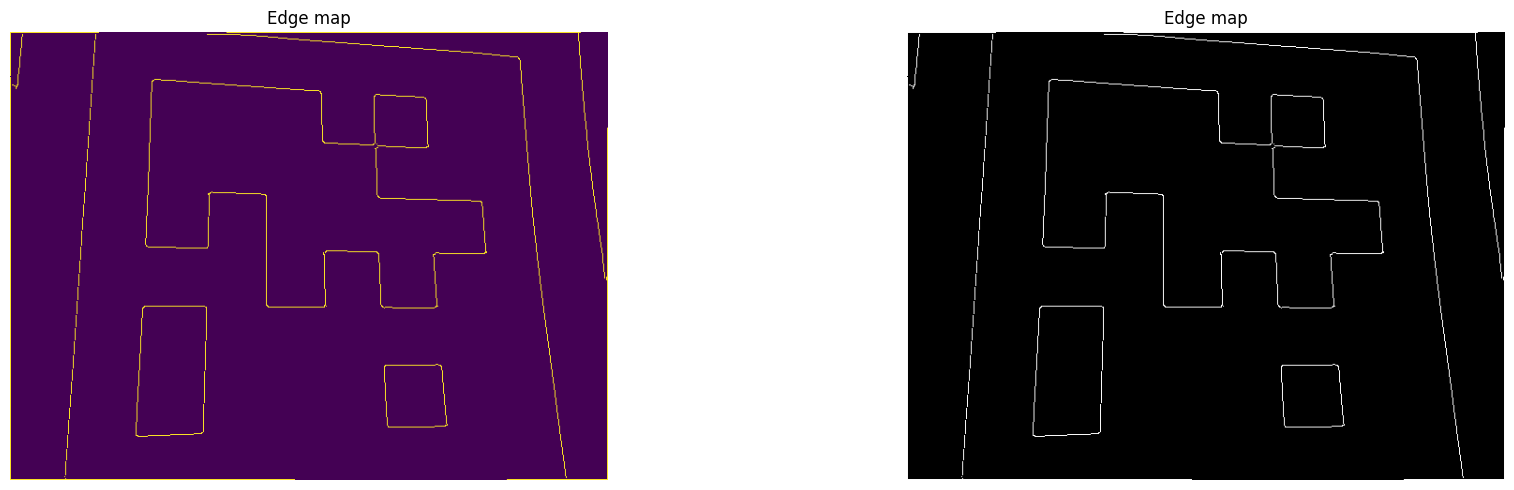

In [265]:
def apply_edge_tracking_by_hysteresis(magnitude, low_threshold, high_threshold):
    # Apply edge tracking by hysteresis to detect strong and weak edges
    rows, cols = magnitude.shape
    edge_map = np.zeros((rows, cols), dtype=np.uint8)
    
    strong_edge_i, strong_edge_j = np.where(magnitude >= high_threshold)
    weak_edge_i, weak_edge_j = np.where((magnitude >= low_threshold) & (magnitude < high_threshold))

    # mark strong edges as white (255)
    edge_map[strong_edge_i, strong_edge_j] = 255

    # mark weak edges as white if they are connected to strong edges
    for i, j in zip(weak_edge_i, weak_edge_j):
        if (edge_map[i-1:i+2, j-1:j+2] == 255).any():
            edge_map[i, j] = 255
    # Traverse the map backward to avoid any missing
    for i, j in zip(np.flip(weak_edge_i), np.flip(weak_edge_j)):
        if (edge_map[i-1:i+2, j-1:j+2] == 255).any():
            edge_map[i, j] = 255
    return edge_map

mag_max = np.max(img_grad_mag_supp)
low_th = 0.05 * mag_max
high_th = 0.3 * mag_max
edge_map = apply_edge_tracking_by_hysteresis(img_grad_mag_supp, low_th, high_th)


fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Display the vertical edge detection
axes[0].imshow(edge_map)
axes[0].set_title('Edge map')
axes[0].axis('off')

# Display the horizontal edge detection
axes[1].imshow(edge_map, cmap='gray')
axes[1].set_title('Edge map')
axes[1].axis('off')


plt.tight_layout()
plt.show()

### Implementation using OpenCV (Optional)

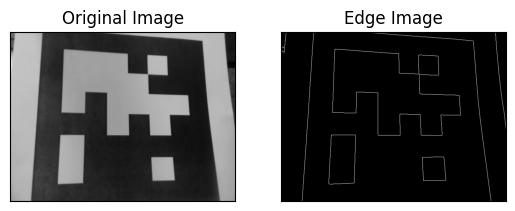

In [241]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('photo.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()